# **Problem statment**
# **Loan Approval Prediction**

-- The Dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution.

-- The dataset of loan approval based on the given features..

-- This dataset have 4269 rows & 13 columns.

**Column Heads:**

-- **loan_id** : Unique identifier for each loan.

-- **no_of_dependents** : Number of dependents of the loan applicant.

-- **education** : Educational qualification of the applicant (Graduate or Not Graduate).

-- **self_employed** : Employment status of the applicant (Yes or No).

-- **income_annum** : Annual income of the applicant (in currency).

-- **loan_amount** : Total amount of the loan requested.

-- **loan_term** : Duration of the loan (in months).

-- **cibil_score** : Credit score of the applicant.

-- **residential_assets_value**

-- **commercial_assets_value**

-- **luxury_assets_value**

-- **bank_asset_value**

-- **loan_status**: Target variable indicating whether the loan was Approved or Rejected.

* **TARGET VARIABLE in this Dtaset is 'loan_status'**

**Goals**:

* The primary real-life goal of this dataset is to build a model that can accurately predict whether a loan application should be approved or rejected.
* **Automate the loan approval process**: By using a model, lenders can significantly reduce the time and effort required to manually assess each application.
* **Minimize risk**: The model can identify potentially risky applicants and help lenders avoid losses due to loan defaults.
* **Improve efficiency**: Automation allows loan officers to focus on more complex cases and improve overall operational efficiency.
* **Enhance customer experience:** Faster loan decisions lead to a better experience for loan applicants.
* **Expand access to credit**: By identifying creditworthy individuals who might have been overlooked by traditional methods, the model can potentially increase access to credit for underserved populations.
---

# Libraries

In [1]:
import pandas as pd
import numpy as np

#Ploating
import matplotlib.pyplot as plt
import seaborn as sns

#Emcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# x-y split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# ***Understanding the data***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Columns education,self_employed & loan_status are object variables.
And other variables are numerical variables

In [4]:
df.shape

(4269, 13)

This dataset have 4269 rows & 13 columns

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There is no Null values(Missing values) in the Dataset

In [8]:
df.duplicated().sum()

0

There is no Duplicated rows in the Dataset

# Data Cleaning

In [9]:
# Coping df into df1
df1=df.copy()

In [10]:
# Dropping Column 'loan_id'
df1=df1.drop('loan_id',axis=1)

# Data visualization

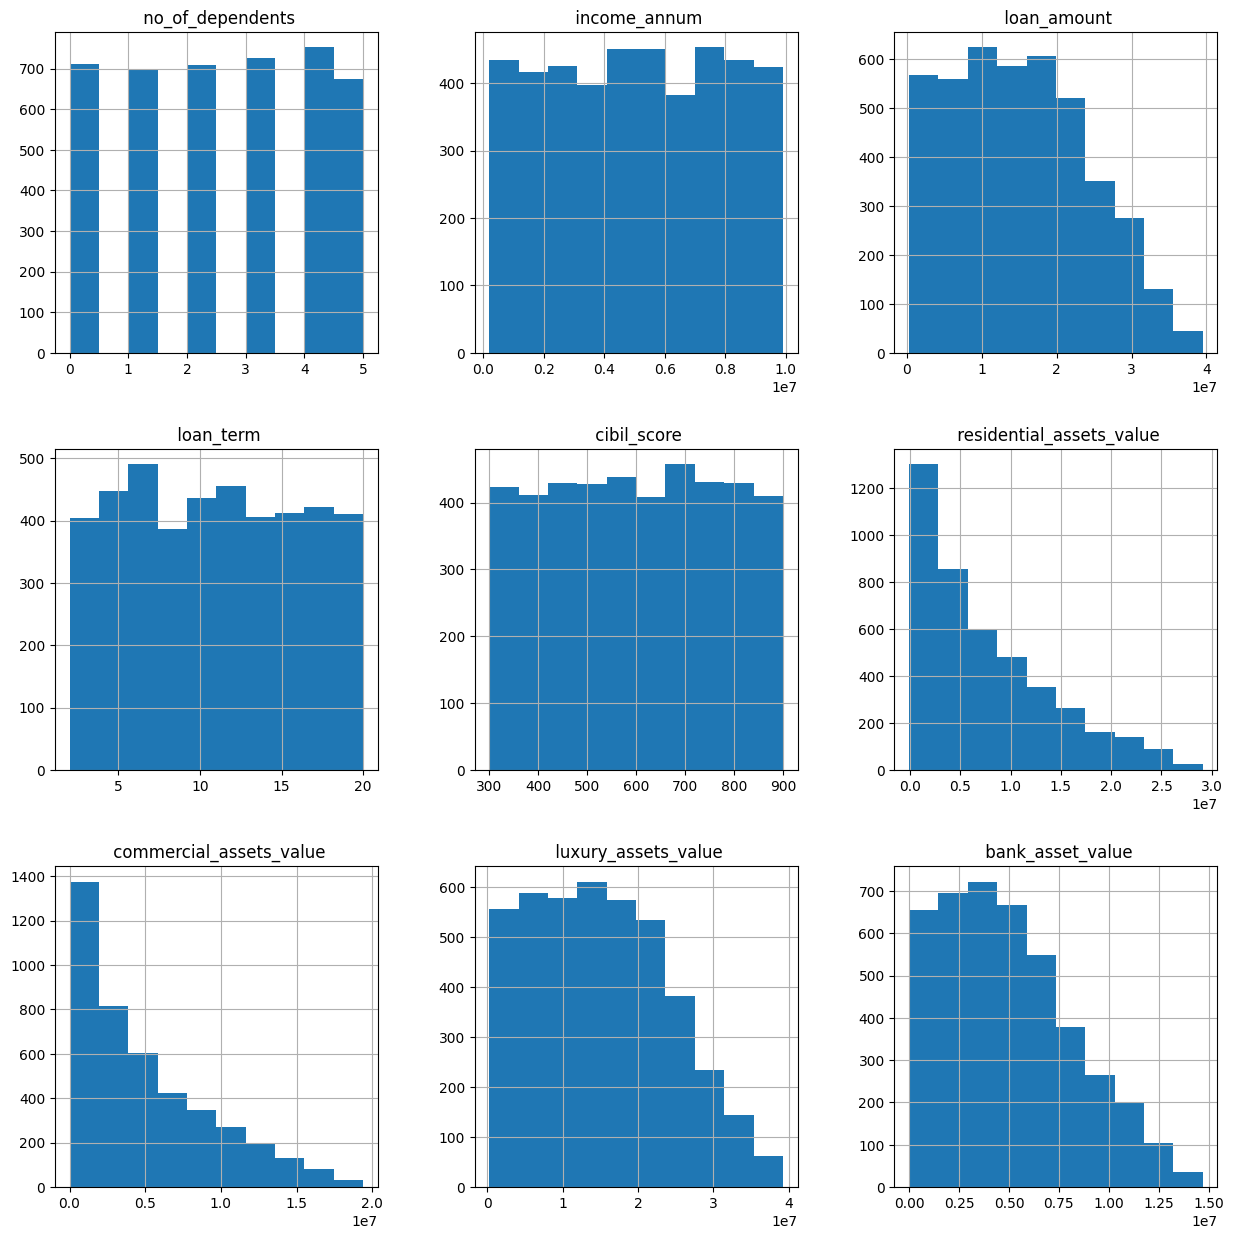

In [11]:
df1.hist(figsize=(15,15))
plt.show()

In [12]:
df1.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

loan_status

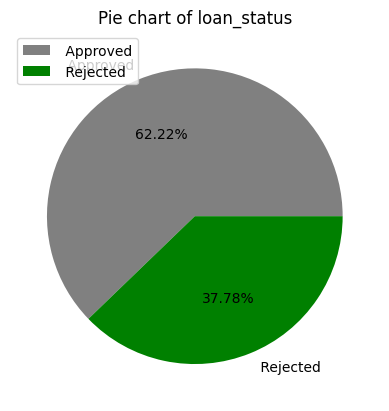

In [13]:
plt.pie(df1[' loan_status'].value_counts(),labels=df1[' loan_status'].value_counts().index,colors=['grey','g'],autopct='%1.2f%%')
plt.legend(df1[' loan_status'].unique())
plt.title('Pie chart of loan_status')
plt.show()

education

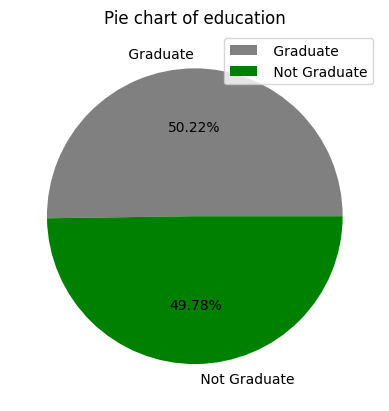

In [14]:
plt.pie(df1[' education'].value_counts(),labels=df1[' education'].value_counts().index,colors=['grey','g'],autopct='%1.2f%%')
plt.legend(df1[' education'].unique())
plt.title('Pie chart of education')
plt.show()

self_employed

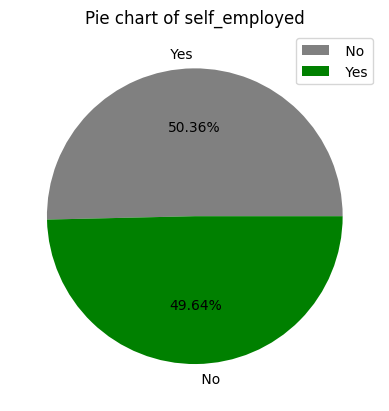

In [15]:
plt.pie(df1[' self_employed'].value_counts(),labels=df1[' self_employed'].value_counts().index,colors=['grey','g'],autopct='%1.2f%%')
plt.legend(df1[' self_employed'].unique())
plt.title('Pie chart of self_employed')
plt.show()

no_of_dependents

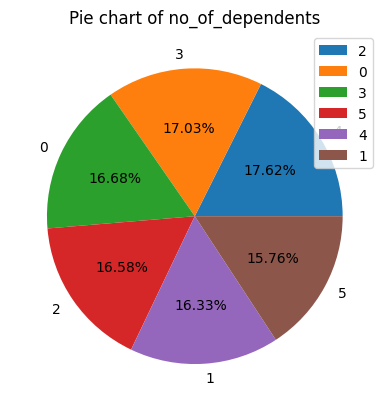

In [16]:
plt.pie(df1[' no_of_dependents'].value_counts(),labels=df1[' no_of_dependents'].value_counts().index,autopct='%1.2f%%')
plt.legend(df1[' no_of_dependents'].unique())
plt.title('Pie chart of no_of_dependents')
plt.show()

income_annum

<Axes: ylabel='Density'>

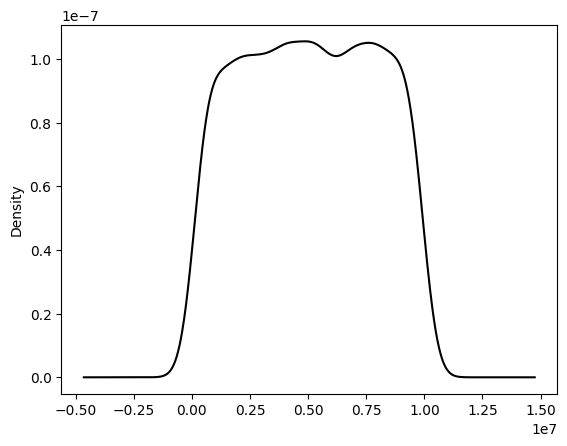

In [17]:
df1[' income_annum'].plot(kind='kde',color='k')

In [18]:
df1[' income_annum'].skew()

-0.012814425096650109

loan_amount

<Axes: ylabel='Density'>

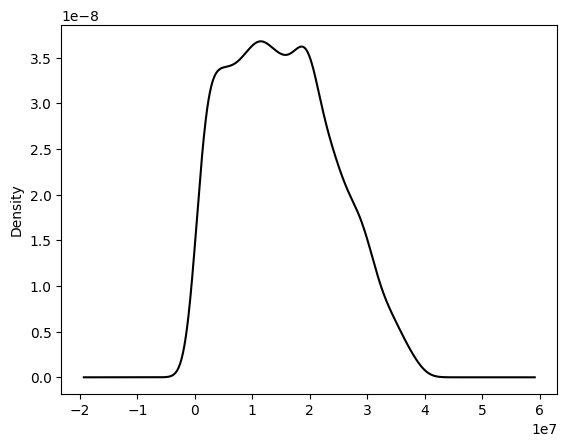

In [19]:
df1[' loan_amount'].plot(kind='kde',color='k')

In [20]:
df1[' loan_amount'].skew()

0.30872388482299223

residential_assets_value

<Axes: ylabel='Density'>

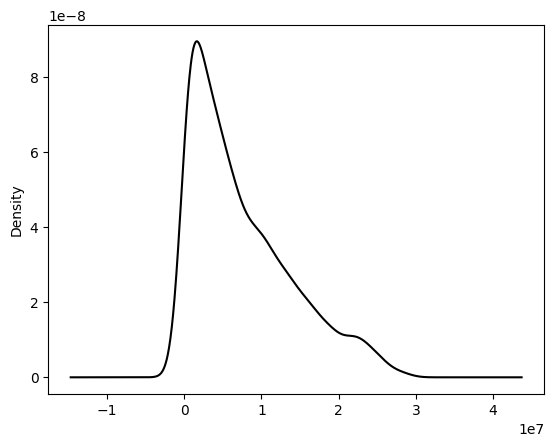

In [21]:
df1[' residential_assets_value'].plot(kind='kde',color='k')

In [22]:
df1[' residential_assets_value'].skew()

0.9784505965115631

commercial_assets_value

<Axes: ylabel='Density'>

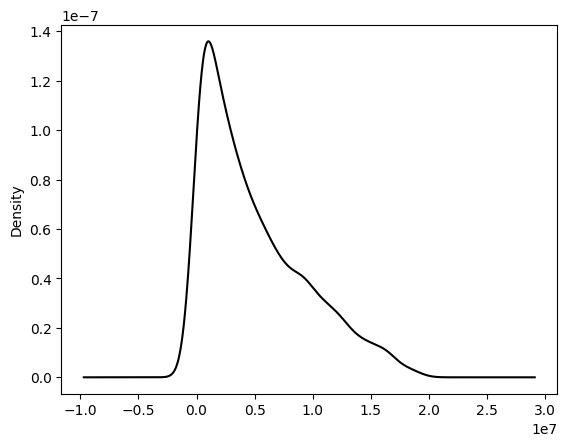

In [23]:
df1[' commercial_assets_value'].plot(kind='kde',color='k')

In [24]:
df1[' commercial_assets_value'].skew()

0.9577908874986114

luxury_assets_value

<Axes: ylabel='Density'>

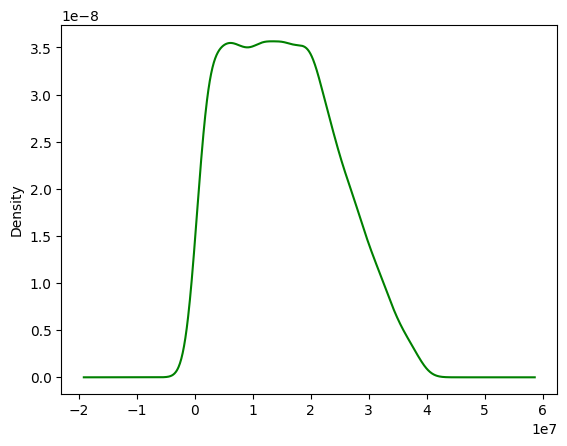

In [25]:
df1[' luxury_assets_value'].plot(kind='kde',color='g')

In [26]:
df1[' luxury_assets_value'].skew()

0.3222075028955774

bank_asset_value

<Axes: ylabel='Density'>

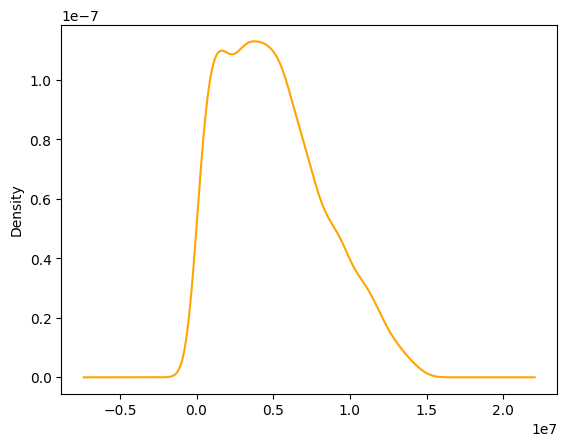

In [27]:
df1[' bank_asset_value'].plot(kind='kde',color='orange')

In [28]:
df1[' bank_asset_value'].skew()

0.5607250089736816

Loan Approved & Rejected on self employed & unemployed

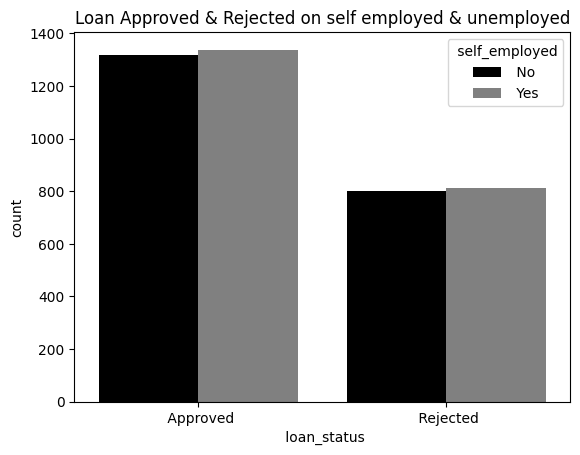

In [29]:
sns.countplot(x=df1[' loan_status'],hue=df1[' self_employed'],palette=['k','grey'])
plt.title('Loan Approved & Rejected on self employed & unemployed')
plt.show()

Loan Approved & Rejected on education

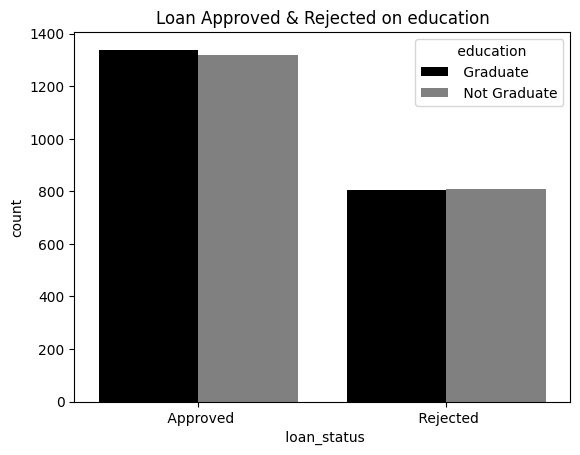

In [30]:
sns.countplot(x=df1[' loan_status'],hue=df1[' education'],palette=['k','grey'])
plt.title('Loan Approved & Rejected on education')
plt.show()

# Encoding

education

In [31]:
df1[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [32]:
df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0],inplace=True)

/tmp/ipykernel_17/1936274764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0],inplace=True)
/tmp/ipykernel_17/1936274764.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0

self_employed

In [33]:
df1[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [34]:
df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)

/tmp/ipykernel_17/1078842419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)
/tmp/ipykernel_17/1078842419.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)


loan_status

In [35]:
df1[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [36]:
df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],inplace=True)

/tmp/ipykernel_17/3432510851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],inplace=True)
/tmp/ipykernel_17/3432510851.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],in

In [37]:
df1.dtypes

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

Now all variables are numeric

# Correlation Analysis:

In [38]:
c=df1.corr()
c

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,0.002817,0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465


In [39]:
s=df1.corr()[' loan_status']
s.sort_values(ascending=False)

loan_status                 1.000000
cibil_score                 0.770518
loan_amount                 0.016150
commercial_assets_value     0.008246
education                   0.004918
self_employed               0.000345
bank_asset_value           -0.006778
residential_assets_value   -0.014367
income_annum               -0.015189
luxury_assets_value        -0.015465
no_of_dependents           -0.018114
loan_term                  -0.113036
Name:  loan_status, dtype: float64

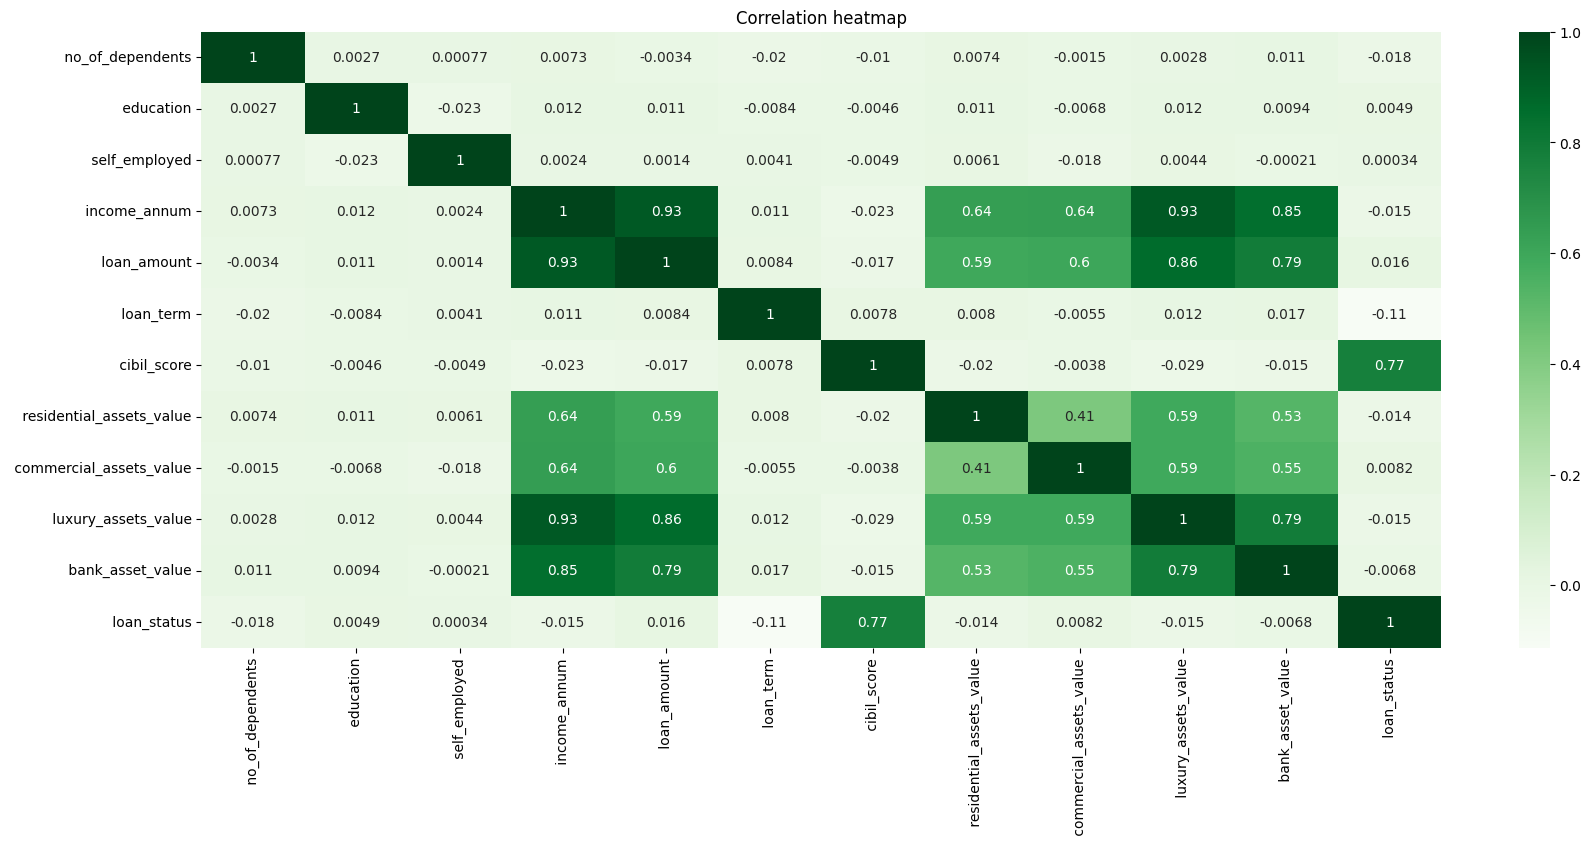

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

# Feature Selection

In [41]:
x=df1[[' no_of_dependents',' education',' self_employed',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']]
y=df1[' loan_status']

# Data Splitting

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Initial Modeling & Hypothesis Testing:

In [43]:
# List of Classification models to apply
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    # "CatBoost": CatBoostClassifier(verbose=0),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

skf = StratifiedKFold(n_splits=5)

In [44]:
from sklearn.model_selection import cross_val_score
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)

    cv_score = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy').mean()

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'CV Accuracy': cv_score,
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        # 'MCC': matthews_corrcoef(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A',
        'Confusion Matrix': confusion_matrix(y_test, y_pred).ravel()  # (tn, fp, fn, tp)
    }
    return metrics

In [45]:
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

results = {}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    metrics = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[model_name] = metrics

results_df = pd.DataFrame(results).T

results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df

Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating XGBoost...
Training and evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2128, number of negative: 1287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623133 -> initscore=0.502869
[LightGBM] [Info] Start training from score 0.502869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

,CV Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix
XGBoost,0.98243,0.987119,0.984991,0.994318,0.989632,0.998856,"[318, 8, 3, 525]"
LightGBM,0.985066,0.987119,0.984991,0.994318,0.989632,0.99907,"[318, 8, 3, 525]"
Decision Tree,0.974817,0.981265,0.986692,0.982955,0.98482,0.980741,"[319, 7, 9, 519]"
Random Forest,0.980381,0.978923,0.982955,0.982955,0.982955,0.997287,"[317, 9, 9, 519]"
AdaBoost,0.966618,0.970726,0.973635,0.979167,0.976393,0.994678,"[312, 14, 11, 517]"
Extra Trees,0.960469,0.961358,0.973231,0.964015,0.968601,0.990995,"[312, 14, 19, 509]"
Naive Bayes,0.755198,0.777518,0.744928,0.973485,0.844007,0.955719,"[150, 176, 14, 514]"
SVC,0.623133,0.618267,0.618267,1.0,0.76411,0.532737,"[0, 326, 0, 528]"
Logistic Regression,0.623426,0.618267,0.618545,0.998106,0.763768,0.517371,"[1, 325, 1, 527]"
KNN,0.562225,0.579625,0.635634,0.75,0.688097,0.538907,"[99, 227, 132, 396]"


* **The best performing model is: LightGBM**

# Model Generation

In [46]:
model = LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2128, number of negative: 1287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623133 -> initscore=0.502869
[LightGBM] [Info] Start training from score 0.502869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier()

# Prediction

In [47]:
x_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
790,5,0,1,4600000,14500000,14,561,2300000,6200000,10200000,5800000
188,5,0,1,7300000,23300000,6,622,7100000,11600000,26400000,10500000
2761,4,0,0,7900000,25700000,18,589,4300000,300000,25300000,9800000
2857,4,1,1,5600000,13000000,4,899,10500000,9100000,11400000,6400000
2403,1,0,0,9300000,27500000,6,364,12200000,13800000,25300000,10800000
...,...,...,...,...,...,...,...,...,...,...,...
618,3,0,1,2000000,6900000,6,834,2200000,2800000,6400000,3000000
2610,1,1,1,5800000,13000000,12,862,11300000,8400000,12000000,3900000
3176,4,0,1,3100000,8200000,18,408,2900000,3800000,10800000,3100000
2917,2,1,0,1700000,5700000,10,602,4900000,2700000,4500000,1800000


In [48]:
y_test

790     1
188     1
2761    1
2857    1
2403    0
       ..
618     1
2610    1
3176    0
2917    1
3096    1
Name:  loan_status, Length: 854, dtype: int64

In [49]:
input_data=(4,	1,	1,	7200000,	23100000,	14,	644,	13300000,	3500000,	18300000,	4200000)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[1]


In [50]:
input_data=(1,	0,	0,	9300000,	27500000,	6,	364,	12200000,	13800000,	25300000,	10800000)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[0]


# **Documentation and Reporting**


## **Loan Approval Prediction Dataset Project Reoprt**
**1. Problem Statement:**

- The Dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution.
-
The primary objective is to build a model that accurately predicts the Loan approval based on its features.

**2.Libraries:**
- import required Libraries.

**3. Data Understanding:**
- The dataset has 4269 rows & 13 columns..
- Features include:loan_id,	no_of_dependents,	education,	self_employed,income_annum,	loan_amount,	loan_term,	cibil_score,	residential_assets_value,	commercial_assets_value,	luxury_assets_value,	bank_asset_value &	loan_status.

- There is no Null values(Missing values) in the Dataset.
- There is no Duplicated rows in the Dataset.
- Columns education,self_employed & loan_status are object variables. And other variables are numerical variables.

**4. Data Cleanig & Feature Engineering:**
-  Dropped Column 'loan_id'

**5. Data Visualization:**
- Histogram were created for entire dataset to understand their distribution.
- Pie chart created for loan_status, education,	self_employed & no_of_dependents to understand their percent for each value.
- kdeplot created for income_annum,	loan_amount, residential_assets_value,	commercial_assets_value,	luxury_assets_value &	bank_asset_value to understand their distribution & skewness.

**6.Encoding**
- Change the data type of columns education	self_employed & loan_status for object into intiger using replace method.

**7. Correlation Analysis:**
- Correlation Analysis: a heatmap of the correlation matrix revealed the relationships between the variables.

**8. Feature Selection**
- Target column stored in y variable.
- Other features stored in x variable.

**9. Data Splitting**
- split x_train, x_test, y_train and y_test.

**10. Initial Modeling & Hypothesis Testing:**

-- Multiple Classification models were tested:-
* LogisticRegression()
* DecisionTreeClassifier()
* RandomForestClassifier()
* XGBClassifier()
* LGBMClassifier()
* CatBoostClassifier(verbose=0)
* SVC(probability=True)
* KNeighborsClassifier()
* GaussianNB()
* MLPClassifier()
* AdaBoostClassifier()
* ExtraTreesClassifier()

--  **LGBMClassifier** has given the best result.And it was chosen as the final model.

**11.Model Generation:**
-- Evaluation metrics included CV Accuracy	, Test Accuracy , Precision ,	Recall , F1 Score ,	ROC-AUC &	Confusion Matrix.

* CV Accuracy : 0.985066
* Test Accuracy : 0.987119
*	Precision :	0.984991
*	Recall : 0.988636
*	F1 Score :	0.985836
*	ROC-AUC :	0.998031
*	Confusion Matrix :	[317, 9, 6, 522]

**12.Prediction**
- Try prediction.And the prediction is amazing.

**THANK YOU**